In [1]:
import pandas as pd

# Crear un diccionario con los datos
data = {
    'EDAD': [55, 56, 58, 56, 59, 57, 60, 53, 59],
    'RIESGO': ['ALTO', 'MEDIO', 'MEDIO', 'BAJO', 'BAJO', 'MEDIO', 'BAJO', 'ALTO', 'MEDIO'],
    'EXAMEN': ['SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI']
}

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
display(df)


,EDAD,RIESGO,EXAMEN
0,55,ALTO,SI
1,56,MEDIO,NO
2,58,MEDIO,SI
3,56,BAJO,NO
4,59,BAJO,NO
5,57,MEDIO,SI
6,60,BAJO,SI
7,53,ALTO,NO
8,59,MEDIO,SI


### Numerizacion

In [3]:
mapeo = {
    "RIESGO": {'BAJO': 1, 'MEDIO': 2, 'ALTO': 3}
}

df.replace(mapeo, inplace=True)
display(df)

,EDAD,RIESGO,EXAMEN
0,55,3,SI
1,56,2,NO
2,58,2,SI
3,56,1,NO
4,59,1,NO
5,57,2,SI
6,60,1,SI
7,53,3,NO
8,59,2,SI


### **Calculo correlacion lineal**

In [4]:
correlacion = df['EDAD'].corr(df['RIESGO'])
print(correlacion)

-0.7150969419341943


### a) Interpretación del coeficiente de correlación lineal entre los atributos EDAD y RIESGO:

El coeficiente de correlación lineal obtenido es **-0.71**. Esto se interpreta de la siguiente manera:

1. **Dirección de la correlación**:
   - El signo negativo (-) indica que hay una **correlación negativa** entre los atributos EDAD y RIESGO. Esto significa que, en general, a medida que aumenta la EDAD, el RIESGO tiende a disminuir, y viceversa.

2. **Intensidad de la correlación**:
   - El valor absoluto de 0.71 está en el rango de 0.7 a 1, lo que indica que la correlación es **fuerte**. Es decir, la relación inversa entre la EDAD y el RIESGO es significativa.

En resumen, **-0.71** indica que existe una fuerte relación inversa entre la edad de los pacientes y su nivel de riesgo. A medida que la edad aumenta, el riesgo tiende a disminuir, según los datos numerizados.



### **Normalizo**

In [5]:
df_normalizado = df.copy()
df_normalizado['EDAD'] = (df['EDAD'] - df['EDAD'].min()) / (df['EDAD'].max() - df['EDAD'].min())
df_normalizado['RIESGO'] = (df['RIESGO'] - df['RIESGO'].min()) / (df['RIESGO'].max() - df['RIESGO'].min())
display(df_normalizado)

,EDAD,RIESGO,EXAMEN
0,0.285714,1.0,SI
1,0.428571,0.5,NO
2,0.714286,0.5,SI
3,0.428571,0.0,NO
4,0.857143,0.0,NO
5,0.571429,0.5,SI
6,1.000000,0.0,SI
7,0.000000,1.0,NO
8,0.857143,0.5,SI


### **Pesos**

In [6]:
weight = [0.0807, 0.074, -0.0742]

### **Test Perceptron**

In [7]:
def formula(edad, riesgo, weight):
    edad_normalizada = (edad - df['EDAD'].min()) / (df['EDAD'].max() - df['EDAD'].min())
    return (edad_normalizada*weight[0] + riesgo*weight[1] + weight[2])

y_1 = (formula(50,1,weight) > 0)*1
y_2 = (formula(51,2,weight) > 0)*1
y_3 = (formula(54,3,weight) > 0)*1

print(f"{y_1}\n{y_2}\n{y_3}\n")

0
1
1



### **Cuestionario**

C:\Users\Peter\AppData\Local\Temp\ipykernel_22044\3294634165.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace(mapeo_copy, inplace=True)


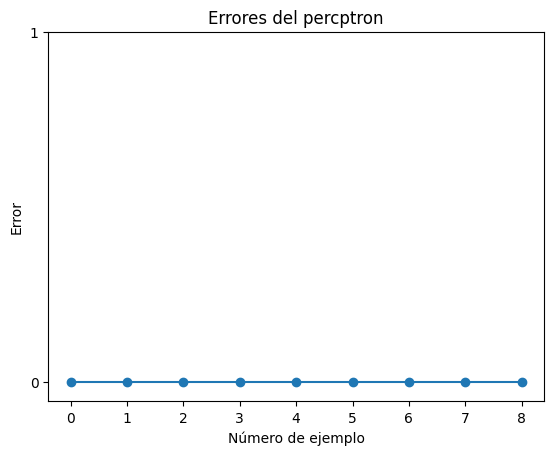

1

: 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

weights = [0.0807, 0.074, -0.0742]


df_copy = df_normalizado.copy()
mapeo_copy = {
    'EXAMEN': {'SI':1, 'NO':0}
}
df_copy.replace(mapeo_copy, inplace=True)

T = df_copy['EXAMEN']

errores = []    
for fila in range(len(df_copy)):
    # Obtener los valores de entrada de la fila
    fila_data = df_copy.iloc[fila]
    real = T.iloc[fila]
        
    # Calcular la salida del perceptrón
    y = (fila_data['EDAD'] * weights[0]) + \
        (fila_data['RIESGO'] * weights[1]) + \
        weights[2]

    # Calcular la salida binaria (1 si y >= 0, de lo contrario 0)
    salida = 1 if y >= 0 else 0

    # Verificar si la clasificación es correcta
    if salida != real:
        errores.append(1)
    else:
        errores.append(0)
    
# Graficar los errores
plt.figure()
plt.plot(range(len(errores)), errores, marker='o')
plt.title(f'Errores del percptron')
plt.xlabel('Número de ejemplo')
plt.ylabel('Error')

plt.xticks(ticks=range(len(errores)))
plt.yticks(ticks=[0,1])
plt.show()

y_cuestionario = (formula(55,2,weights) > 0)*1
y_cuestionario